The plot shows the radial profile of the current density $ J_z(r) $ as a function of distance $ r $ for different values of the parameters $ a $ and $ c_1 $. Increasing $ a $ broadens and shifts the peak of $ J_z(r) $ outward, while decreasing $ c_1 $ reduces the overall magnitude of the current density. This behavior illustrates how the current distribution becomes more diffuse and weaker as confinement parameters change.


```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import mu_0 # [N A^-2]
from matplotlib.ticker import ScalarFormatter

import scienceplots
plt.style.use(['science', 'notebook'])

a_  = 1                      # [m]
c_  = 2e6                    # [A/m^2]
r_  = np.linspace(0, 1, 200) # [m]

J_z = lambda r,a,c: c*(r**2/a**2) / (1 + r**2/a**2)**3 
I   = lambda r,a,c: a*a*np.pi*c*( 1/2 + 1/(2*((1 + (r/a)**2)**2)) - 1/(1+(r/a)**2) )
B_theta = lambda r,a,c: (mu_0*I(r,a,c)) / (2*np.pi*r)
p   = lambda r,a,c: (mu_0*a*a*c*c/2) * ( ( 1/((1 + (r/a)**2)**2) - 1/4 )/8 + 
                                         ( 1/((1 + (r/a)**2)**4) - 1/16 )/16 + 
                                         ( 1/8 - 1/((1 + (r/a)**2)**3) )/6 )


# Create a vertical figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(13, 4.5), sharex=True)


axs[0].plot(r_, J(r_, a_, c_), color='k')
axs[0].set_xlabel(r"Radius $r$ [m]")
axs[0].set_ylabel(r"Current Density $J(r)$ [A/m$^2$]")
axs[0].grid(alpha=0.5)


axs[1].plot(r_, B_theta(r_, a_, c_), color='k')
axs[1].set_xlabel(r"Radius $r$ [m]")
axs[1].set_ylabel(r"Magnetic Field $B_\theta(r)$ [T]")
axs[1].grid(alpha=0.5)


axs[2].plot(r_, p(r_, a_, c_), color='k')
axs[2].set_xlabel(r"Radius $r$ [m]")
axs[2].set_ylabel(r"Pressure $p(r)$ [Pa]")
axs[2].grid(alpha=0.5)


for ax in axs:
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.tight_layout(pad=2)
plt.show();
```


/tmp/ipykernel_53875/1547512415.py:24: RuntimeWarning: divide by zero encountered in divide
  B_theta = lambda J0, b, r: ( (mu_0*J0)/(2*b*r) )*( 1 - 1/(1+b*r**2) )
/tmp/ipykernel_53875/1547512415.py:24: RuntimeWarning: invalid value encountered in multiply
  B_theta = lambda J0, b, r: ( (mu_0*J0)/(2*b*r) )*( 1 - 1/(1+b*r**2) )


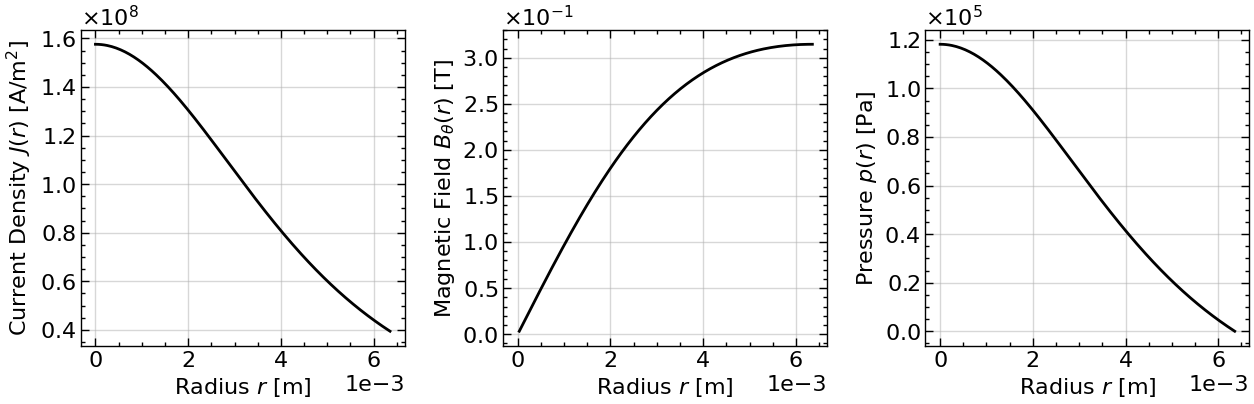

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import mu_0, c
from matplotlib.ticker import ScalarFormatter

import scienceplots
plt.style.use(['science', 'notebook'])

r_p = lambda Ld, v_e, Z, Ti, Te: ( Ld*c*2*np.sqrt(2)*( 1 + (Ti/(Z*Te)) )**0.5 ) / v_e 

Ld  = 5.3e-7 # [m]
v_e = 1e5    # [m/s]
Ti  = 50     # [eV]
Te  = 50     # [eV] 
Z   = 1
b   = 1/r_p(Ld, v_e, Z, Ti, Te)**2 #[m^-2]

I  = 2e4       # [A]
J0 = b*I/np.pi # [A/m^2]

r = np.linspace(0, r_p(Ld, v_e, Z, Ti, Te), 200)

J_z = lambda J0, b, r: J0 / (1 + b*r**2)**2
B_theta = lambda J0, b, r: ( (mu_0*J0)/(2*b*r) )*( 1 - 1/(1+b*r**2) )
p_r = lambda J0, b, r: ( (mu_0*J0*J0)/(8*b) )*( 1/( 1 + b*r**2 )**2 - 1/4)

# Create a vertical figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(13, 4.5), sharex=True)


axs[0].plot(r, J_z(J0, b, r), color='k')
axs[0].set_xlabel(r"Radius $r$ [m]")
axs[0].set_ylabel(r"Current Density $J(r)$ [A/m$^2$]")
axs[0].grid(alpha=0.5)


axs[1].plot(r, B_theta(J0, b, r), color='k')
axs[1].set_xlabel(r"Radius $r$ [m]")
axs[1].set_ylabel(r"Magnetic Field $B_\theta(r)$ [T]")
axs[1].grid(alpha=0.5)


axs[2].plot(r, p_r(J0, b, r), color='k')
axs[2].set_xlabel(r"Radius $r$ [m]")
axs[2].set_ylabel(r"Pressure $p(r)$ [Pa]")
axs[2].grid(alpha=0.5)


for ax in axs:
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

plt.tight_layout(pad=2)
plt.show();

In [3]:
r_p(Ld, v_e, Z, Ti, Te)

np.float64(0.006355600109600001)

In [4]:
J0*1e-8

np.float64(1.5760391273799192)

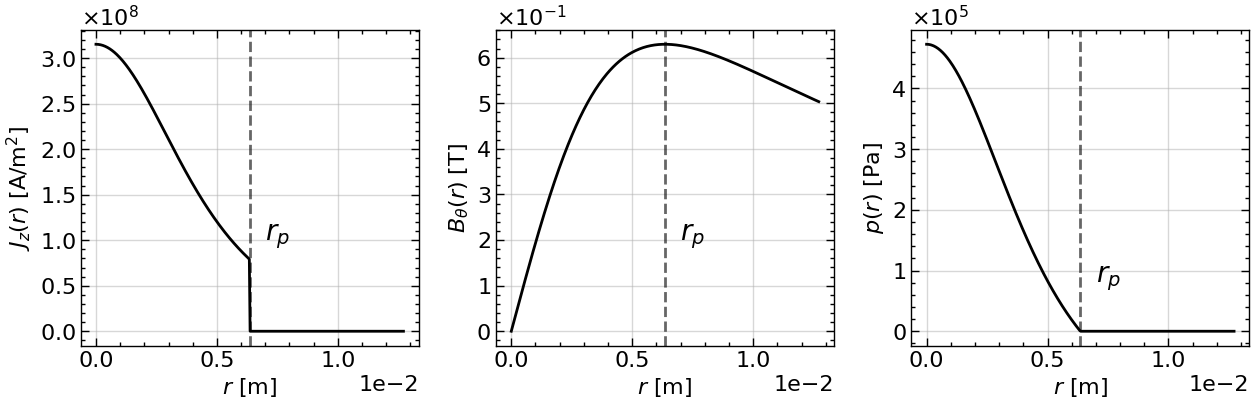

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import mu_0, c
from matplotlib.ticker import ScalarFormatter

# given parameters
Ld  = 5.3e-7      # m
ve  = 1e5         # m/s
Ti  = 50.0        # eV
Te  = 50.0        # eV
Z   = 1
I   = 2e4         # A

rp  = Ld * c/ve * 2*np.sqrt(2)*np.sqrt(1 + Ti/(Z*Te))
b   = 1.0 / rp**2
J0  = 2 * b * I / np.pi

r   = np.linspace(0, 2*rp, 400)            # look beyond rp to show truncation
eps = 1e-9                                 # avoid r=0 divide in any fallback

Bth = (mu_0*J0*r)/(2*(1+b*r*r))

# piecewise pressure: inside -> formula with 1/4; outside -> 0
p_in = (mu_0*J0**2/(8*b)) * (1/(1 + b*r**2)**2 - 1/4.0)
p    = np.where(r <= rp, p_in, 0.0)

Jz_  = J0 / (1 + b*r**2)**2
Jz   = np.where(r <= rp, Jz_, 0.0)

fig, axs = plt.subplots(1, 3, figsize=(13, 4.5), sharex=False)

axs[0].plot(r, Jz, color="k")
axs[0].set_xlabel(r"$r$ [m]")
axs[0].set_ylabel(r"$J_z(r)$ [A/m$^2$]")
axs[0].grid(alpha=0.5)

axs[1].plot(r, Bth, color="k")
axs[1].set_xlabel(r"$r$ [m]")
axs[1].set_ylabel(r"$B_\theta(r)$ [T]")
axs[1].grid(alpha=0.5)

axs[2].plot(r, p, color="k")
axs[2].set_xlabel(r"$r$ [m]")
axs[2].set_ylabel(r"$p(r)$ [Pa]")
axs[2].grid(alpha=0.5)

for ax in axs:
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    ax.axvline(rp, ls='--', alpha=0.6, color="k")   # mark r_p
    
axs[0].text(rp*1.1, 1.005e8, "$r_p$", fontsize=20)
axs[1].text(rp*1.1, 2.008e-1, "$r_p$", fontsize=20)
axs[2].text(rp*1.1, 0.808e5, "$r_p$", fontsize=20)

plt.tight_layout(pad=2)
plt.show();


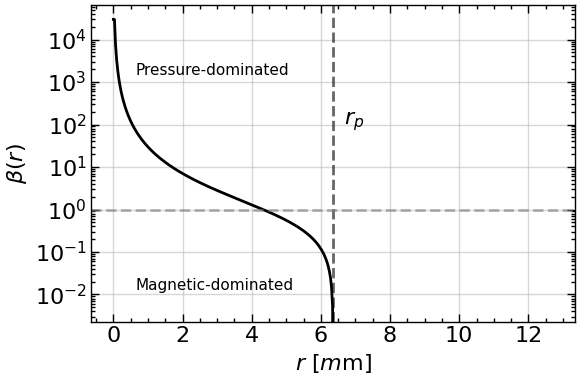

In [69]:
beta = np.zeros_like(r)
# to handle singularity
beta[1:] = 2*mu_0*p[1:] / (Bth[1:]**2)
beta[0] = beta[1]

plt.figure(figsize=(6,4))
plt.plot(r*1e3, beta, color="k")
plt.axvline(rp*1e3, ls="--", alpha=0.6, color="k")
plt.axhline(1, ls="--", alpha=0.6, color="gray")
plt.xlabel(r"$r$ [$m$m]")
plt.ylabel(r"$\beta(r)$")
plt.yscale("log")     # often beta spans several orders
plt.grid(alpha=0.5)
plt.text(rp*1.05*1e3, 1e2, "$r_p$", fontsize=16)
plt.text(rp*0.1*1e3, 1.5e3, "Pressure-dominated", fontsize=11)
plt.text(rp*0.1*1e3, 1.3e-2, "Magnetic-dominated", fontsize=11)

plt.tight_layout()
plt.show()


In [73]:
J0*1e-8

np.float64(3.1520782547598385)